In [6]:
import matplotlib.pylab as plt
import pickle
import numpy as np
exp_path = './expres/'
plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle']
plt.rcParams['font.sans-serif'] = "Sans Serif"
plt.rcParams['font.family'] = "sans-serif"


from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter
# Set the font properties (make sure the path is correct)
# tnr_font_18 = FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/times.ttf', size=18)
# tnr_font_14 = FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/times.ttf', size=14)
font_size_b = 40
font_size_s = 30

# SansSerif

In [7]:
def l2norm(list1, list2):
    # print("Here is l2-norm. {}\n{}\n".format(list1, list2))
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length.")
    if not list2 or all(value == 0 for value in list2):
        raise ValueError("The second list cannot be all zeros or empty for L2 norm-based error ratio calculation.")
    
    if not list1 or all(value == 0 for value in list1):
        raise ValueError("The first list cannot be all zeros or empty for L2 norm-based error ratio calculation.")
    list1, list2 = list2, list1
    l2_norm_difference = sum((x - y) ** 2 for x, y in zip(list1, list2)) ** 0.5
    l2_norm_reference = sum(y ** 2 for y in list1) ** 0.5
    return l2_norm_difference / l2_norm_reference

# def_shap = ['Comb-Shapley', 'Perm-Shapley', 'DIG-FL']
# samp_shap= ['Extended-TMC', "Extended-GTB", "CC-Shapley"]
# grad_shap= ['GTG-Shapley', 'OR', "$lambda$-MR"]
# ligh_shap= ['Light Sampling']

def baralgstimes(all_algsres, name='cnn'):
    # x = np.arange(algsres['Comb-Shapley'][0])
    # dim = ['Times']
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    #       '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    dim = ['Clients #3', 'Clients #6', 'Clients #10', 'Clients #15']
    x = np.arange(len(dim))
    # x = 2
    w = 0.075
    # print("Comb-Shapley-Time:", all_algsres[0]['Comb-Shapley'][1])
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x[0]-w*3, all_algsres[0]['Comb-Shapley'][1],  color='#8EBA42', width=w, label="MC-Shapley", edgecolor='k', linewidth=1)
    ax.bar(x[0]-w*4, all_algsres[0]['Perm-Shapley'][1],  color='#FFFF00', width=w, label="Perm-Shapley", edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[0]-w*2, all_algsres[0]['DIG-FL'][1],        color="#8EBA42", width=w, label="DIG-FL", edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[0]-w*1, all_algsres[0]['Extended-GTB'][1],  color="#FFB5B8", width=w, label="Extended-GTB", edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[0]+w*0, all_algsres[0]['CC-Shapley'][1],    color="#E24A33", width=w, label="CC-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*1, all_algsres[0]['Extended-TMC'][1],  color="#348ABD", width=w, label="Extended-TMC", edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[0]+w*2, all_algsres[0]['GTG-Shapley'][1],   color="#1F77b4", width=w, label="GTG-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*3, all_algsres[0]['OR'][1],            color="#FF7F0E", width=w, label="OR", edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[0]+w*4, all_algsres[0]['$lambda$-MR'][1],   color="#2CA02C", width=w, label="$\lambda$-MR", edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[0]+w*5, all_algsres[0]['Light Sampling'][1],color="#D62728", width=w, label="IPSS (ours)", edgecolor='k', linewidth=1, hatch="oo")


    # print("Comb-Shapley-Time:", all_algsres[1]['Comb-Shapley'][1])
    ax.bar(x[1]-w*3,   all_algsres[1]['Comb-Shapley'][1],  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    ax.bar(x[1]-w*4,   all_algsres[1]['Perm-Shapley'][1],  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[1]-w*2,    all_algsres[1]['DIG-FL'][1],         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[1]-w*1,     all_algsres[1]['Extended-GTB'][1],  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[1]+w*0, all_algsres[1]['CC-Shapley'][1],    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*1, all_algsres[1]['Extended-TMC'][1],  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[1]+w*2, all_algsres[1]['GTG-Shapley'][1],   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*3, all_algsres[1]['OR'][1],            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[1]+w*4, all_algsres[1]['$lambda$-MR'][1],   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[1]+w*5, all_algsres[1]['Light Sampling'][1],color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")


    # print("Comb-Shapley-Time:", all_algsres[2]['Comb-Shapley'][1])
    ax.bar(x[2]-w*3,   all_algsres[2]['Comb-Shapley'][1],  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    ax.bar(x[2]-w*4,   all_algsres[2]['Perm-Shapley'][1],  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[2]-w*2,    all_algsres[2]['DIG-FL'][1],         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[2]-w*1,     all_algsres[2]['Extended-GTB'][1],  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[2]+w*0, all_algsres[2]['CC-Shapley'][1],    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[2]+w*1, all_algsres[2]['Extended-TMC'][1],  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[2]+w*2, all_algsres[2]['GTG-Shapley'][1],   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[2]+w*3, all_algsres[2]['OR'][1],            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[2]+w*4, all_algsres[2]['$lambda$-MR'][1],   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[2]+w*5, all_algsres[2]['Light Sampling'][1],color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")

    # print("Comb-Shapley-Time:", all_algsres[1]['Comb-Shapley'][1])
    ax.bar(x[3]-w*3,   all_algsres[3]['Comb-Shapley'][1],  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    # ax.bar(x[3]-w*4,   all_algsres[3]['Perm-Shapley'][1],  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[3]-w*2,    all_algsres[3]['DIG-FL'][1],         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[3]-w*1,     all_algsres[3]['Extended-GTB'][1],  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[3]+w*0, all_algsres[3]['CC-Shapley'][1],    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[3]+w*1, all_algsres[3]['Extended-TMC'][1],  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[3]+w*2, all_algsres[3]['GTG-Shapley'][1],   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[3]+w*3, all_algsres[3]['OR'][1],            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[3]+w*4, all_algsres[3]['$lambda$-MR'][1],   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[3]+w*5, all_algsres[3]['Light Sampling'][1],color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")
    
    plt.text(x[3]-w*4.5, 3, "X", ha='center',va='bottom', fontsize=40, color='r')
   
    # pass
    ax.set_yscale('log')
    ax.set_ylabel('Running Time (s)', fontsize=font_size_b)
    # ax.set_xlabel('Experimental Results of Real-world Dataset', fontsize=18)
    ax.set_ylim(top=10**(7))
    plt.xticks(x, labels=dim, fontsize=font_size_s)
    # plt.xticks(x, fontsize=12)
    plt.xticks(fontsize=font_size_s, color='black')
    plt.yticks(fontsize=font_size_s, color='black')

    plt.grid(axis = 'x')
    # plt.legend(ncol=6, loc='upper center', fontsize=10)
    # plt.legend(ncol=2, loc=2, bbox_to_anchor=(0, 1.0), fontsize=font_size_s)
    plt.tight_layout()
    plt.gca().xaxis.label.set_color('black')
    plt.gca().yaxis.label.set_color('black')
    plt.savefig('./figs/exp_real_data_time_'+name+'.png')

In [8]:
def baralgserror(all_algsres, name='cnn'):
    dim = ['Clients #3', 'Clients #6', 'Clients #10', 'Clients #15']
    x = np.arange(len(dim))
    # x = 2
    w = 0.075
    # print("Comb-Shapley-Time:", all_algsres[0]['Comb-Shapley'][0])
    fig, ax = plt.subplots(figsize=(14, 8))

    exact = all_algsres[0]['Comb-Shapley'][0]
    # print("Comb-Shapley-ACC:", l2norm(exact, all_algsres[0]['Comb-Shapley'][0]))
    # fig, ax = plt.subplots(figsize=(16, 4))
    # ax.bar(x[0]-w*3,    0,  color='#8EBA42', width=w, label="Comb-Shapley", edgecolor='k', linewidth=1)
    # ax.bar(x[0]-w*4,    0,  color='#FFFF00', width=w, label="Perm-Shapley", edgecolor='k', linewidth=1, hatch="")
    # print("Extended-GTB is ", list(all_algsres[0]['Extended-GTB'][0]))
    # print("Extended-GTB-L2-Norm: {}".format(l2norm(exact, all_algsres[0]['Extended-GTB'][0])))
    ax.bar(x[0]-w*3,    0,  color='#8EBA42', width=w,  edgecolor='k', linewidth=1)
    ax.bar(x[0]-w*4,    0,  color='#FFFF00', width=w,  edgecolor='k', linewidth=1, hatch="")    
    ax.bar(x[0]-w*2,    l2norm(exact, all_algsres[0]['DIG-FL'][0]),        color="#8EBA42", width=w, label="DIG-FL", edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[0]-w*1,    l2norm(exact, list(all_algsres[0]['Extended-GTB'][0])),  color="#FFB5B8", width=w, label="Extended-GTB", edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[0]+w*0,    l2norm(exact, all_algsres[0]['CC-Shapley'][0]),    color="#E24A33", width=w, label="CC-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*1,    l2norm(exact, all_algsres[0]['Extended-TMC'][0]),  color="#348ABD", width=w, label="Extended-TMC", edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[0]+w*2,    l2norm(exact, all_algsres[0]['GTG-Shapley'][0]),   color="#1F77b4", width=w, label="GTG-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*3,    l2norm(exact, all_algsres[0]['OR'][0]),            color="#FF7F0E", width=w, label="OR", edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[0]+w*4,    l2norm(exact, all_algsres[0]['$lambda$-MR'][0]),   color="#2CA02C", width=w, label="$\lambda$-MR", edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[0]+w*5,    l2norm(exact, all_algsres[0]['Light Sampling'][0]),color="#D62728", width=w, label="IPSS (ours)", edgecolor='k', linewidth=1, hatch="oo")
    
    exact = all_algsres[1]['Comb-Shapley'][0]
    # print("Comb-Shapley-ACC:", l2norm(exact, all_algsres[1]['Comb-Shapley'][0]))
    ax.bar(x[1]-w*3,   0,  color='#8EBA42', width=w,  edgecolor='k', linewidth=1)
    ax.bar(x[1]-w*4,   0,  color='#FFFF00', width=w,  edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[1]-w*2,   l2norm(exact, all_algsres[1]['DIG-FL'][0]),        color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[1]-w*1,   l2norm(exact, list(all_algsres[1]['Extended-GTB'][0])),  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[1]+w*0,   l2norm(exact, all_algsres[1]['CC-Shapley'][0]),    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*1,   l2norm(exact, all_algsres[1]['Extended-TMC'][0]),  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[1]+w*2,   l2norm(exact, all_algsres[1]['GTG-Shapley'][0]),   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*3,   l2norm(exact, all_algsres[1]['OR'][0]),            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[1]+w*4,   l2norm(exact, all_algsres[1]['$lambda$-MR'][0]),   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[1]+w*5,   l2norm(exact, all_algsres[1]['Light Sampling'][0]),color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")

    exact = all_algsres[2]['Comb-Shapley'][0]
    # print("Comb-Shapley-Time:", l2norm(exact, all_algsres[2]['Comb-Shapley'][0]))
    ax.bar(x[2]-w*3,   0,  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    ax.bar(x[2]-w*4,   0,  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[2]-w*2,   l2norm(exact, all_algsres[2]['DIG-FL'][0]),         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[2]-w*1,   l2norm(exact, list(all_algsres[2]['Extended-GTB'][0])),  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[2]+w*0,   l2norm(exact, all_algsres[2]['CC-Shapley'][0]),    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[2]+w*1,   l2norm(exact, all_algsres[2]['Extended-TMC'][0]),  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[2]+w*2,   l2norm(exact, all_algsres[2]['GTG-Shapley'][0]),   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[2]+w*3,   l2norm(exact, all_algsres[2]['OR'][0]),            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[2]+w*4,   l2norm(exact, all_algsres[2]['$lambda$-MR'][0]),   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[2]+w*5,   l2norm(exact, all_algsres[2]['Light Sampling'][0]),color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")


    exact = all_algsres[3]['Comb-Shapley'][0]
    # print("Comb-Shapley-Time:", l2norm(exact, all_algsres[3]['Comb-Shapley'][0]))
    ax.bar(x[3]-w*3,   0,  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    ax.bar(x[3]-w*4,   0,  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[3]-w*2,   l2norm(exact, all_algsres[3]['DIG-FL'][0]),         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[3]-w*1,   l2norm(exact, list(all_algsres[3]['Extended-GTB'][0])),  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[3]+w*0,   l2norm(exact, all_algsres[3]['CC-Shapley'][0]),    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[3]+w*1,   l2norm(exact, all_algsres[3]['Extended-TMC'][0]),  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[3]+w*2,   l2norm(exact, all_algsres[3]['GTG-Shapley'][0]),   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[3]+w*3,   l2norm(exact, all_algsres[3]['OR'][0]),            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[3]+w*4,   l2norm(exact, all_algsres[3]['$lambda$-MR'][0]),   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[3]+w*5,   l2norm(exact, all_algsres[3]['Light Sampling'][0]),color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")      
    
    ax.set_yscale('log')
    ax.set_ylabel('Relative Error ($L_{2}$-norm)', fontsize=font_size_b)
    # ax.set_xlabel('Experimental Results of Real-world Dataset', fontsize=18)
    # ax.set_ylim(top=10**(7))
    plt.xticks(x, labels=dim, fontsize=font_size_s)

    # plt.xticks(x, fontsize=12)
    plt.xticks(fontsize=font_size_s, color='black')
    plt.yticks(fontsize=font_size_s, color='black')
    plt.grid(axis = 'x')
    # plt.legend(ncol=6, loc='upper center', fontsize=10)
    # plt.legend(ncol=2, loc=2, bbox_to_anchor=(0, 1.0), fontsize=font_size_s)
    plt.tight_layout()
    plt.gca().xaxis.label.set_color('black')
    plt.gca().yaxis.label.set_color('black')
    plt.savefig('./figs/exp_real_data_error_'+name+'.png')

In [9]:
def plotalgtime(all_algsres):
    dim = ['#3', '#6', '#10', '#15']
    fig, ax = plt.subplots(figsize=(8, 6))
    x = range(len(dim))

    perm_shapley_time = [all_algsres[_]['Perm-Shapley'][1]   for _ in range(len(dim))]
    perm_shapley_time[len(dim)-1] = perm_shapley_time[len(dim)-2]*10**3

    # print([all_algsres[_]['Comb-Shapley'][1] for _ in range(len(dim))])
    ax.plot(dim, [all_algsres[_]['Comb-Shapley'][1]   for _ in range(len(dim))],  color='#7F7F7F', label="MC-Shapley", linewidth=3, marker = "o", markersize=10, linestyle='dotted', alpha=1)
    ax.plot(dim, perm_shapley_time                                             ,  color='#FFFF00', label="Perm-Shapley", linewidth=3, marker = "s", markersize=10, linestyle='dotted', alpha=1)
    ax.plot(dim, [all_algsres[_]['DIG-FL'][1]         for _ in range(len(dim))],  color="#8EBA42", label="DIG-FL", linewidth=3, marker = "p", markersize=10, linestyle='dotted', alpha=1)
    ax.plot(dim, [all_algsres[_]['Extended-GTB'][1]   for _ in range(len(dim))],  color="#90EE90", label="Extended-GTB", linewidth=3, marker = "P", markersize=10, linestyle='dashed')
    ax.plot(dim, [all_algsres[_]['CC-Shapley'][1]     for _ in range(len(dim))],  color="#E24A33", label="CC-Shapley", linewidth=3, marker = ">", markersize=10, linestyle='dashed', alpha=1)
    ax.plot(dim, [all_algsres[_]['Extended-TMC'][1]   for _ in range(len(dim))],  color="#348ABD", label="Extended-TMC", linewidth=3, marker = "X", markersize=10, linestyle='dashed', alpha=1)
    ax.plot(dim, [all_algsres[_]['GTG-Shapley'][1]    for _ in range(len(dim))],  color="#1F77b4", label="GTG-Shapley", linewidth=3, marker = "D", markersize=10, linestyle='dashdot', alpha=1)
    ax.plot(dim, [all_algsres[_]['OR'][1]             for _ in range(len(dim))],  color="#FF7F0E", label="OR", linewidth=3, marker = "v", markersize=10, linestyle='dashdot')
    ax.plot(dim, [all_algsres[_]['$lambda$-MR'][1]    for _ in range(len(dim))],  color="#2CA02C", label="$\lambda$-MR", linewidth=3, marker = "<", markersize=10, linestyle='dashdot')
    ax.plot(dim, [all_algsres[_]['Light Sampling'][1] for _ in range(len(dim))],  color="#D62728", label="IPSS (ours)", linewidth=3, marker = "*", markersize=10, linestyle='solid')

    ax.set_yscale('log')
    ax.set_ylabel('Running Time (s)', fontsize=18, color='black')
    # ax.set_xlabel()
    # ax.set_xlabel('Experimental Results of Real-world Dataset', fontsize=18)
    ax.set_ylim(top=10**(7))
    plt.xticks(x, labels=dim, fontsize=14, color='black')
    # plt.xticks(x, fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis = 'x')
    # plt.legend(ncol=6, loc='upper center', fontsize=10)
    # plt.legend(ncol=2, loc=2, bbox_to_anchor=(0, 1.0), fontsize=14)
    plt.tight_layout()
    # ax.plot(all_algsres[:]['DIG-FL'][0])

In [10]:
def plotalgerror(all_algsres):
    dim = ['#3', '#6', '#10', '#15']
    fig, ax = plt.subplots(figsize=(8, 6))
    x = range(len(dim))

    perm_shapley_time = [all_algsres[_]['Perm-Shapley'][1]   for _ in range(len(dim))]
    perm_shapley_time[len(dim)-1] = perm_shapley_time[len(dim)-2]*10**3

    # print([all_algsres[_]['Comb-Shapley'][1] for _ in range(len(dim))])
    
    exact = [all_algsres[_]['Comb-Shapley'][0] for _ in range(len(dim))]
    # exact = [l2(all_algsres[_]['Comb-Shapley'][0]   for _ in range(len(dim))]
    # ax.plot(dim, [all_algsres[_]['Comb-Shapley'][1]   for _ in range(len(dim))],  color='#7F7F7F', label="Comb-Shapley", linewidth=3, marker = "o", markersize=10, linestyle='dotted', alpha=1)
    # ax.plot(dim, perm_shapley_time                                             ,  color='#FFFF00', label="Perm-Shapley", linewidth=3, marker = "s", markersize=10, linestyle='dotted', alpha=1)
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['DIG-FL'][0])         for _ in range(len(dim))],  color="#8EBA42", label="DIG-FL", linewidth=3, marker = "p", markersize=10, linestyle='dotted', alpha=1)
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['Extended-GTB'][0])   for _ in range(len(dim))],  color="#90EE90", label="Extended-GTB", linewidth=3, marker = "P", markersize=10, linestyle='dashed')
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['CC-Shapley'][0])     for _ in range(len(dim))],  color="#E24A33", label="CC-Shapley", linewidth=3, marker = ">", markersize=10, linestyle='dashed', alpha=1)
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['Extended-TMC'][0])   for _ in range(len(dim))],  color="#348ABD", label="Extended-TMC", linewidth=3, marker = "X", markersize=10, linestyle='dashed', alpha=1)
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['GTG-Shapley'][0])    for _ in range(len(dim))],  color="#1F77b4", label="GTG-Shapley", linewidth=3, marker = "D", markersize=10, linestyle='dashdot', alpha=1)
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['OR'][0])             for _ in range(len(dim))],  color="#FF7F0E", label="OR", linewidth=3, marker = "v", markersize=10, linestyle='dashdot')
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['$lambda$-MR'][0])    for _ in range(len(dim))],  color="#2CA02C", label="$\lambda$-MR", linewidth=3, marker = "<", markersize=10, linestyle='dashdot')
    ax.plot(dim, [l2norm(exact[_], all_algsres[_]['Light Sampling'][0]) for _ in range(len(dim))],  color="#D62728", label="IPSS (ours)", linewidth=3, marker = "*", markersize=10, linestyle='solid')

    ax.set_yscale('log')
    ax.set_ylabel('Relative Error ($L_{2}$-norm)', fontsize=18)
    # ax.set_xlabel('Experimental Results of Real-world Dataset', fontsize=18)
    # ax.set_ylim(top=10**(8))
    plt.xticks(x, labels=dim, fontsize=14)
    # plt.xticks(x, fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis = 'x')
    # plt.legend(ncol=6, loc='upper center', fontsize=10)
    plt.legend(ncol=2, loc=2, bbox_to_anchor=(0, 1.0), fontsize=14)
    # plt.tight_layout()
    # ax.plot(all_algsres[:]['DIG-FL'][0])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Sans Serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Sans Serif


#3#  Comb-Shapley's times=372.5642194629181, l2-norm=0.0
#3#  Perm-Shapley's times=1629.9388129676227, l2-norm=1.09872224319892e-16
#3#  Extended-TMC's times=231.68077939609066, l2-norm=0.8147340316974814
#3#  OR's times=7.900513080065139, l2-norm=0.4569219307126723
#3#  $lambda$-MR's times=22.01235351723153, l2-norm=0.7273699555292739
#3#  Extended-GTB's times=352.51509547093883, l2-norm=0.5968025500758074
#3#  DIG-FL's times=230.08312599302735, l2-norm=95.14215612715898
#3#  CC-Shapley's times=413.13811372581404, l2-norm=0.006635297390591978
#3#  Light Sampling's times=142.48109346989077, l2-norm=0.009678781507846507
#3#  GTG-Shapley's times=26.96514565614052, l2-norm=0.8667076533883757


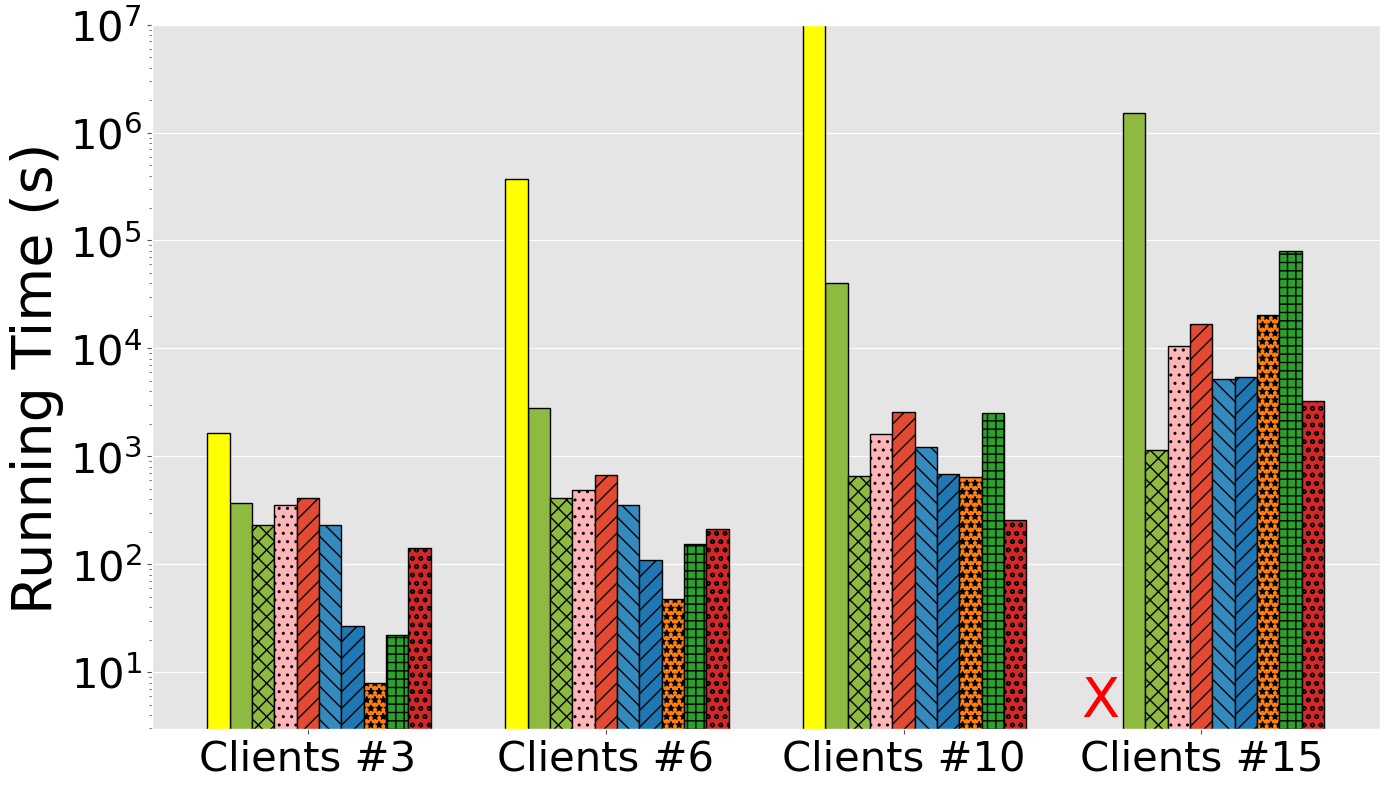

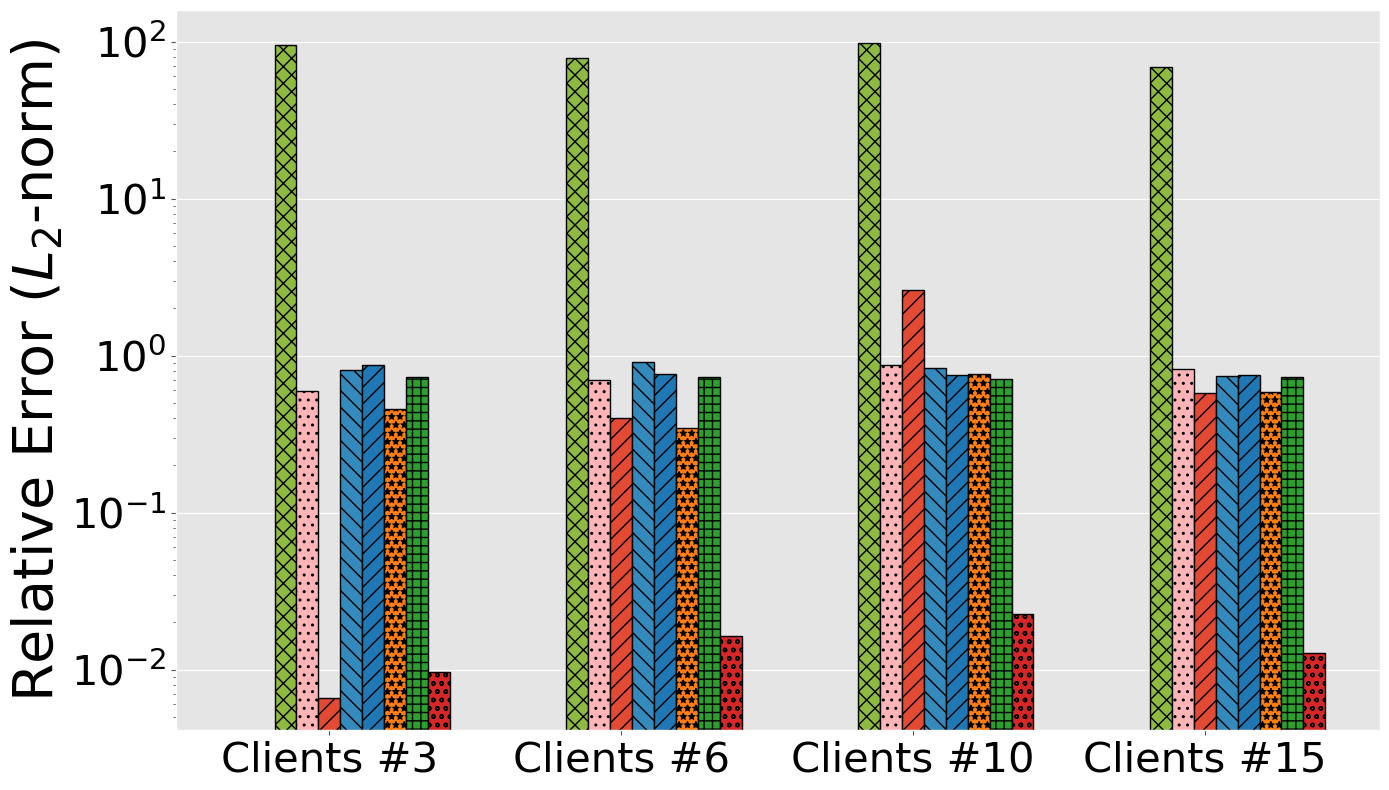

In [11]:
all_algsres = []
cnums = ['3', '6', '10', '15']
# exp_name = 'cnn_model_'+ '_emnist_same.res'
for cnum in cnums:
    with open(exp_path+'cnn_model_'+ cnum +'_emnist_same.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        # print('=================={}==============='.format(cnum))
        # if cnum =='6':
        #     for k, v in alg_res.items():
        #         print(k, '\n', list(v[0]), '\n',v[1], '============================')
    all_algsres.append(alg_res)
    
baralgstimes(all_algsres, 'cnn')
baralgserror(all_algsres, 'cnn')
# plotalgtime(all_algsres)
# plotalgerror(all_algsres)
# print   
for ind, algres in enumerate(all_algsres):
    # print(type(alg_res))
    # if int(ind) > 2: continue
    # print(all_algsres)
    if ind == 0:
        for k, v in algres.items():
            print("#{}#  {}'s times={}, l2-norm={}".format(cnums[ind], k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))



#6#  Comb-Shapley's times=6496.020738383004, l2-norm=0.0
#6#  Perm-Shapley's times=905026.0798357219, l2-norm=3.65036320872697e-15
#6#  Extended-TMC's times=843.0102011019999, l2-norm=0.957399005341329
#6#  OR's times=89.87884703099917, l2-norm=3.134777670060778
#6#  $lambda$-MR's times=228.74935304799692, l2-norm=0.8689913830909048
#6#  Extended-GTB's times=1120.3494761310012, l2-norm=0.903489682507804
#6#  DIG-FL's times=1077.7923555640036, l2-norm=0.7026895376327216
#6#  CC-Shapley's times=2020.3704355470022, l2-norm=1.9324695136083128
#6#  Light Sampling's times=568.2322471950006, l2-norm=0.49158975744176653
#6#  GTG-Shapley's times=161.72841055305253, l2-norm=0.8943410555646608


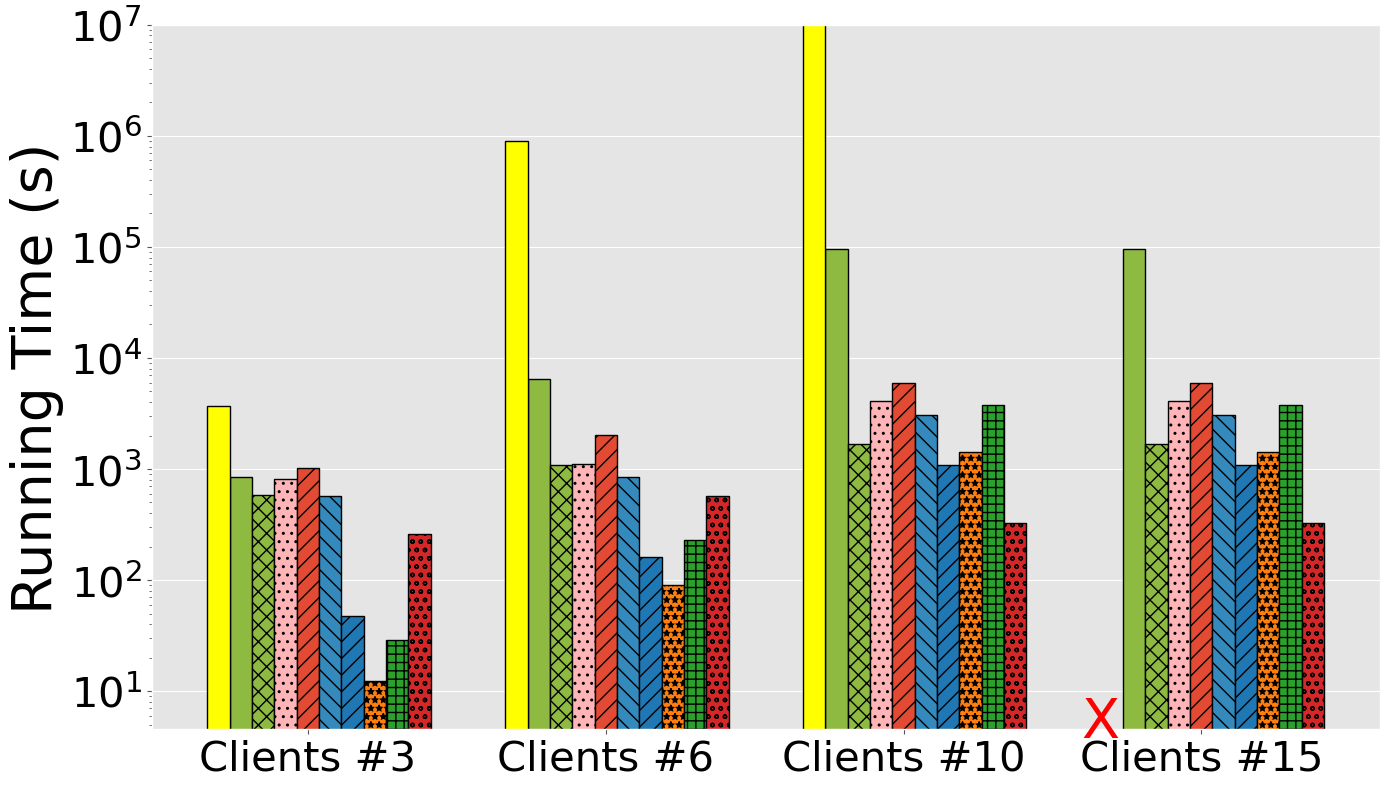

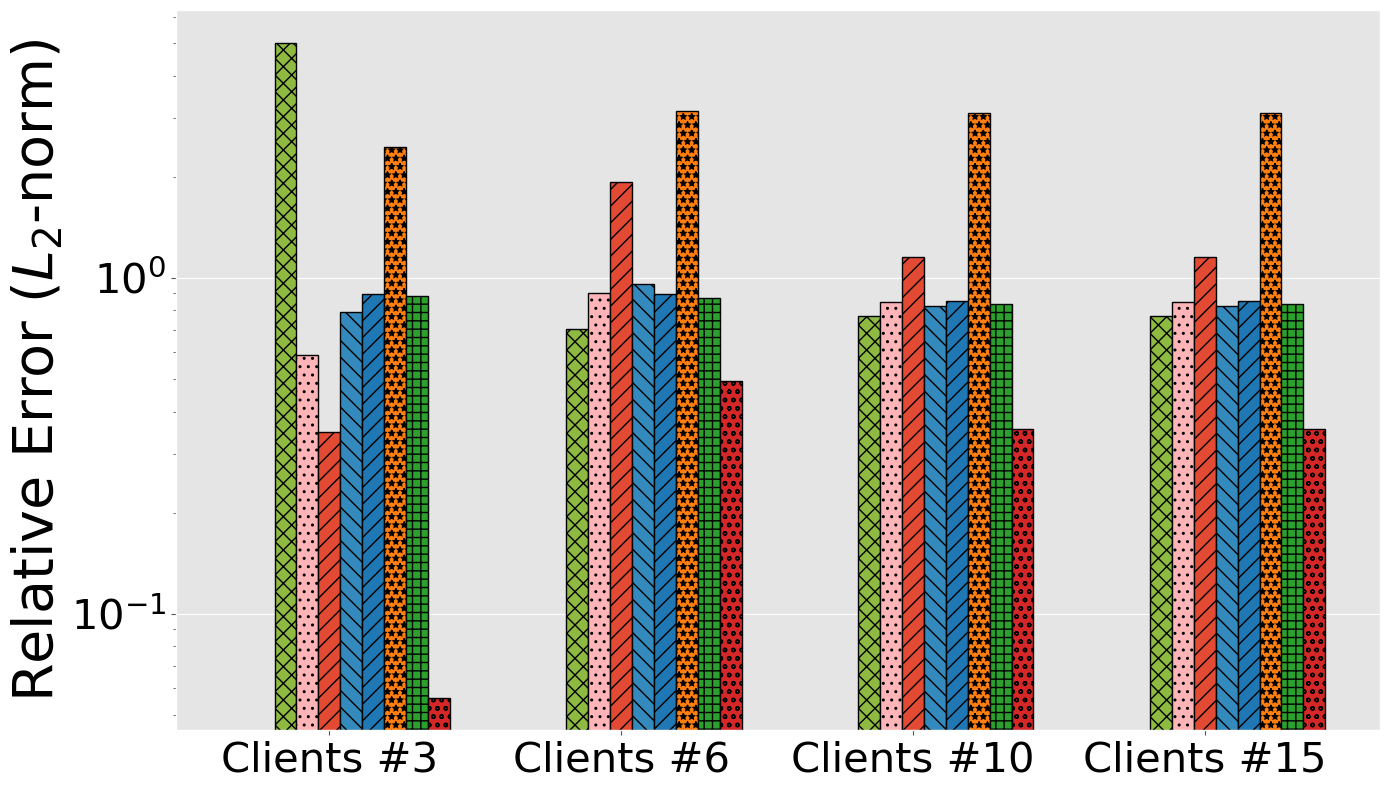

In [12]:
all_algsres = []
cnums = ['3', '6', '10', '10']
# exp_name = 'cnn_model_'+ '_emnist_same.res'
for cnum in cnums:
    with open(exp_path+'linear_model_'+ cnum +'_emnist_same.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        # print('=================={}==============='.format(cnum))
        # if cnum =='6':
        #     for k, v in alg_res.items():
        #         print(k, '\n', list(v[0]), '\n',v[1], '============================')
    all_algsres.append(alg_res)


baralgstimes(all_algsres, 'mlp')
baralgserror(all_algsres, 'mlp')


for ind, algres in enumerate(all_algsres):
    # print(type(alg_res))
    # if int(ind) > 2: continue
    # print(all_algsres)
    if ind == 1:
        for k, v in algres.items():
            print("#{}#  {}'s times={}, l2-norm={}".format(cnums[ind], k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))


In [13]:
def baralgstimes_real(all_algsres, name='cnn'):
    # x = np.arange(algsres['Comb-Shapley'][0])
    # dim = ['Times']
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    #       '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    dim = ['Clients #10 in MLP', 'Clients #10 in CNN']
    x = np.arange(len(dim))
    # x = 2
    w = 0.075
    # print("Comb-Shapley-Time:", all_algsres[0]['Comb-Shapley'][1])
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.bar(x[0]-w*3,   all_algsres[0]['Comb-Shapley'][1],  color='#8EBA42', width=w, label="MC-Shapley", edgecolor='k', linewidth=1)
    ax.bar(x[0]-w*4,     all_algsres[0]['Perm-Shapley'][1],  color='#FFFF00', width=w, label="Perm-Shapley", edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[0]-w*2,   all_algsres[0]['DIG-FL'][1],        color="#8EBA42", width=w, label="DIG-FL", edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[0]-w*1,     all_algsres[0]['Extended-GTB'][1],  color="#FFB5B8", width=w, label="Extended-GTB", edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[0]+w*0, all_algsres[0]['CC-Shapley'][1],    color="#E24A33", width=w, label="CC-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*1, all_algsres[0]['Extended-TMC'][1],  color="#348ABD", width=w, label="Extended-TMC", edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[0]+w*2, all_algsres[0]['GTG-Shapley'][1],   color="#1F77b4", width=w, label="GTG-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*3, all_algsres[0]['OR'][1],            color="#FF7F0E", width=w, label="OR", edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[0]+w*4, all_algsres[0]['$lambda$-MR'][1],   color="#2CA02C", width=w, label="$\lambda$-MR", edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[0]+w*5, all_algsres[0]['Light Sampling'][1],color="#D62728", width=w, label="IPSS (ours)", edgecolor='k', linewidth=1, hatch="oo")


    # print("Comb-Shapley-Time:", all_algsres[1]['Comb-Shapley'][1])
    ax.bar(x[1]-w*3,   all_algsres[1]['Comb-Shapley'][1],  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    ax.bar(x[1]-w*4,   all_algsres[1]['Perm-Shapley'][1],  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[1]-w*2,    all_algsres[1]['DIG-FL'][1],         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[1]-w*1,     all_algsres[1]['Extended-GTB'][1],  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[1]+w*0, all_algsres[1]['CC-Shapley'][1],    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*1, all_algsres[1]['Extended-TMC'][1],  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[1]+w*2, all_algsres[1]['GTG-Shapley'][1],   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*3, all_algsres[1]['OR'][1],            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[1]+w*4, all_algsres[1]['$lambda$-MR'][1],   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[1]+w*5, all_algsres[1]['Light Sampling'][1],color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")


    # # print("Comb-Shapley-Time:", all_algsres[2]['Comb-Shapley'][1])
    # ax.bar(x[2]-w*3,   all_algsres[2]['Comb-Shapley'][1],  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    # ax.bar(x[2]-w*4,   all_algsres[2]['Perm-Shapley'][1],  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    # ax.bar(x[2]-w*2,    all_algsres[2]['DIG-FL'][1],         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    # ax.bar(x[2]-w*1,     all_algsres[2]['Extended-GTB'][1],  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    # ax.bar(x[2]+w*0, all_algsres[2]['CC-Shapley'][1],    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[2]+w*1, all_algsres[2]['Extended-TMC'][1],  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    # ax.bar(x[2]+w*2, all_algsres[2]['GTG-Shapley'][1],   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[2]+w*3, all_algsres[2]['OR'][1],            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    # ax.bar(x[2]+w*4, all_algsres[2]['$lambda$-MR'][1],   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    # ax.bar(x[2]+w*5, all_algsres[2]['Light Sampling'][1],color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")

    # # print("Comb-Shapley-Time:", all_algsres[1]['Comb-Shapley'][1])
    # ax.bar(x[3]-w*3,   all_algsres[3]['Comb-Shapley'][1],  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    # ax.bar(x[3]-w*4,   all_algsres[3]['Perm-Shapley'][1],  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    # ax.bar(x[3]-w*2,    all_algsres[3]['DIG-FL'][1],         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    # ax.bar(x[3]-w*1,     all_algsres[3]['Extended-GTB'][1],  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    # ax.bar(x[3]+w*0, all_algsres[3]['CC-Shapley'][1],    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[3]+w*1, all_algsres[3]['Extended-TMC'][1],  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    # ax.bar(x[3]+w*2, all_algsres[3]['GTG-Shapley'][1],   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[3]+w*3, all_algsres[3]['OR'][1],            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    # ax.bar(x[3]+w*4, all_algsres[3]['$lambda$-MR'][1],   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    # ax.bar(x[3]+w*5, all_algsres[3]['Light Sampling'][1],color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")
    
    # plt.text(x[3]-w*4.5, 3, "N.A.", ha='center',va='bottom', fontsize=20, color='r')
   
    # pass
    ax.set_yscale('log')
    ax.set_ylabel('Running Time (s)', fontsize=font_size_b*1.2)
    # ax.set_xlabel('Experimental Results of Real-world Dataset', fontsize=18)
    # ax.set_ylim(top=10**(7))
    plt.xticks(x, labels=dim, fontsize=font_size_s*1.2)
    # plt.xticks(x, fontsize=12)
    plt.xticks(fontsize=font_size_s*1.2, color='black')
    plt.yticks(fontsize=font_size_s*1.2, color='black')

    plt.grid(axis = 'x')
    # plt.legend(ncol=6, loc='upper center', fontsize=10)
    # plt.legend(ncol=2, loc=2, bbox_to_anchor=(0, 1.0), fontsize=font_size_s*1.1)
    plt.tight_layout()
    plt.gca().xaxis.label.set_color('black')
    plt.gca().yaxis.label.set_color('black')
    # plt.rcParams['savefig.dpi'] = 300
    plt.savefig('./figs/exp_real_data_time_'+name+'.png')

In [14]:
def baralgserror_real(all_algsres, name='cnn'):
    dim = ['Clients #10 in MLP', 'Clients #10 in CNN']
    x = np.arange(len(dim))
    # x = 2
    w = 0.075
    # print("Comb-Shapley-Time:", all_algsres[0]['Comb-Shapley'][0])
    fig, ax = plt.subplots(figsize=(14, 10))

    exact = all_algsres[0]['Comb-Shapley'][0]
    # print("Comb-Shapley-ACC:", l2norm(exact, all_algsres[0]['Comb-Shapley'][0]))
    # fig, ax = plt.subplots(figsize=(16, 4))
    # ax.bar(x[0]-w*3,    0,  color='#8EBA42', width=w, label="Comb-Shapley", edgecolor='k', linewidth=1)
    # ax.bar(x[0]-w*4,    0,  color='#FFFF00', width=w, label="Perm-Shapley", edgecolor='k', linewidth=1, hatch="")
    # print("Extended-GTB is ", list(all_algsres[0]['Extended-GTB'][0]))
    # print("Extended-GTB-L2-Norm: {}".format(l2norm(exact, all_algsres[0]['Extended-GTB'][0])))
    ax.bar(x[0]-w*3,    0,  color='#8EBA42', width=w,  edgecolor='k', linewidth=1)
    ax.bar(x[0]-w*4,    0,  color='#FFFF00', width=w,  edgecolor='k', linewidth=1, hatch="")    
    ax.bar(x[0]-w*2,    l2norm(exact, all_algsres[0]['DIG-FL'][0]),        color="#8EBA42", width=w, label="DIG-FL", edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[0]-w*1,    l2norm(exact, list(all_algsres[0]['Extended-GTB'][0])),  color="#FFB5B8", width=w, label="Extended-GTB", edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[0]+w*0,    l2norm(exact, all_algsres[0]['CC-Shapley'][0]),    color="#E24A33", width=w, label="CC-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*1,    l2norm(exact, all_algsres[0]['Extended-TMC'][0]),  color="#348ABD", width=w, label="Extended-TMC", edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[0]+w*2,    l2norm(exact, all_algsres[0]['GTG-Shapley'][0]),   color="#1F77b4", width=w, label="GTG-Shapley", edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[0]+w*3,    l2norm(exact, all_algsres[0]['OR'][0]),            color="#FF7F0E", width=w, label="OR", edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[0]+w*4,    l2norm(exact, all_algsres[0]['$lambda$-MR'][0]),   color="#2CA02C", width=w, label="$\lambda$-MR", edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[0]+w*5,    l2norm(exact, all_algsres[0]['Light Sampling'][0]),color="#D62728", width=w, label="IPSS (ours)", edgecolor='k', linewidth=1, hatch="oo")
    
    exact = all_algsres[1]['Comb-Shapley'][0]
    # print("Comb-Shapley-ACC:", l2norm(exact, all_algsres[1]['Comb-Shapley'][0]))
    ax.bar(x[1]-w*3,   0,  color='#8EBA42', width=w,  edgecolor='k', linewidth=1)
    ax.bar(x[1]-w*4,   0,  color='#FFFF00', width=w,  edgecolor='k', linewidth=1, hatch="")
    ax.bar(x[1]-w*2,   l2norm(exact, all_algsres[1]['DIG-FL'][0]),        color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    ax.bar(x[1]-w*1,   l2norm(exact, list(all_algsres[1]['Extended-GTB'][0])),  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    ax.bar(x[1]+w*0,   l2norm(exact, all_algsres[1]['CC-Shapley'][0]),    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*1,   l2norm(exact, all_algsres[1]['Extended-TMC'][0]),  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    ax.bar(x[1]+w*2,   l2norm(exact, all_algsres[1]['GTG-Shapley'][0]),   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    ax.bar(x[1]+w*3,   l2norm(exact, all_algsres[1]['OR'][0]),            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    ax.bar(x[1]+w*4,   l2norm(exact, all_algsres[1]['$lambda$-MR'][0]),   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    ax.bar(x[1]+w*5,   l2norm(exact, all_algsres[1]['Light Sampling'][0]),color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")

    # exact = all_algsres[2]['Comb-Shapley'][0]
    # # print("Comb-Shapley-Time:", l2norm(exact, all_algsres[2]['Comb-Shapley'][0]))
    # ax.bar(x[2]-w*3,   0,  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    # ax.bar(x[2]-w*4,   0,  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    # ax.bar(x[2]-w*2,   l2norm(exact, all_algsres[2]['DIG-FL'][0]),         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    # ax.bar(x[2]-w*1,   l2norm(exact, list(all_algsres[2]['Extended-GTB'][0])),  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    # ax.bar(x[2]+w*0,   l2norm(exact, all_algsres[2]['CC-Shapley'][0]),    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[2]+w*1,   l2norm(exact, all_algsres[2]['Extended-TMC'][0]),  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    # ax.bar(x[2]+w*2,   l2norm(exact, all_algsres[2]['GTG-Shapley'][0]),   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[2]+w*3,   l2norm(exact, all_algsres[2]['OR'][0]),            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    # ax.bar(x[2]+w*4,   l2norm(exact, all_algsres[2]['$lambda$-MR'][0]),   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    # ax.bar(x[2]+w*5,   l2norm(exact, all_algsres[2]['Light Sampling'][0]),color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")


    # exact = all_algsres[3]['Comb-Shapley'][0]
    # # print("Comb-Shapley-Time:", l2norm(exact, all_algsres[3]['Comb-Shapley'][0]))
    # ax.bar(x[3]-w*3,   0,  color='#8EBA42', width=w, edgecolor='k', linewidth=1)
    # ax.bar(x[3]-w*4,   0,  color='#FFFF00', width=w, edgecolor='k', linewidth=1, hatch="")
    # ax.bar(x[3]-w*2,   l2norm(exact, all_algsres[3]['DIG-FL'][0]),         color="#8EBA42", width=w, edgecolor='k', linewidth=1, hatch="xx")
    # ax.bar(x[3]-w*1,   l2norm(exact, list(all_algsres[3]['Extended-GTB'][0])),  color="#FFB5B8", width=w, edgecolor='k', linewidth=1, hatch="..")
    # ax.bar(x[3]+w*0,   l2norm(exact, all_algsres[3]['CC-Shapley'][0]),    color="#E24A33", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[3]+w*1,   l2norm(exact, all_algsres[3]['Extended-TMC'][0]),  color="#348ABD", width=w, edgecolor='k', linewidth=1, hatch="\\\\")
    # ax.bar(x[3]+w*2,   l2norm(exact, all_algsres[3]['GTG-Shapley'][0]),   color="#1F77b4", width=w, edgecolor='k', linewidth=1, hatch="//")
    # ax.bar(x[3]+w*3,   l2norm(exact, all_algsres[3]['OR'][0]),            color="#FF7F0E", width=w, edgecolor='k', linewidth=1, hatch="**")
    # ax.bar(x[3]+w*4,   l2norm(exact, all_algsres[3]['$lambda$-MR'][0]),   color="#2CA02C", width=w, edgecolor='k', linewidth=1, hatch="++")
    # ax.bar(x[3]+w*5,   l2norm(exact, all_algsres[3]['Light Sampling'][0]),color="#D62728", width=w, edgecolor='k', linewidth=1, hatch="oo")      
    
    ax.set_yscale('log')
    ax.set_ylabel('Relative Error ($L_{2}$-norm)', fontsize=font_size_b*1.2)
    # ax.set_xlabel('Experimental Results of Real-world Dataset', fontsize=18)
    # ax.set_ylim(top=10**(7))
    plt.xticks(x, labels=dim, fontsize=font_size_s*1.2)

    # plt.xticks(x, fontsize=12)
    plt.xticks(fontsize=font_size_s*1.2, color='black')
    plt.yticks(fontsize=font_size_s*1.2, color='black')
    plt.grid(axis = 'x')
    # plt.legend(ncol=6, loc='upper center', fontsize=10)
    # plt.legend(ncol=2, loc=2, bbox_to_anchor=(0, 1.0), fontsize=font_size_s*1.1)
    plt.tight_layout()
    plt.gca().xaxis.label.set_color('black')
    plt.gca().yaxis.label.set_color('black')
    # plt.rcParams['savefig.dpi'] = 300
    plt.savefig('./figs/exp_real_data_error_'+name+'.png')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Sans Serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Sans Serif


===============================MLP=================================
 Comb-Shapley's times=8732.341062254098, l2-norm=0.0
 Perm-Shapley's times=598476208.0988463, l2-norm=1.7622317398997315e-11
 Extended-TMC's times=190.8935860892525, l2-norm=0.8278053973022477
 OR's times=140.4497080333531, l2-norm=6.657562291629289
 $lambda$-MR's times=1546.8677658420638, l2-norm=0.7530751623090358
 Extended-GTB's times=290.1863598502241, l2-norm=0.7245025448198843
 DIG-FL's times=98.7109808770474, l2-norm=58.39648261628906
 CC-Shapley's times=533.715623366239, l2-norm=0.8104903053097653
 Light Sampling's times=83.87254790618317, l2-norm=0.032731615810273944
 GTG-Shapley's times=429.9512149936636, l2-norm=0.7778758712721114

===========================CNN========================================
 Comb-Shapley's times=25466.78043669404, l2-norm=0.0
 Perm-Shapley's times=1812198581.8509667, l2-norm=9.247569952005811e-12
 Extended-TMC's times=817.1341624690103, l2-norm=0.9030003412285936
 OR's times=213.8

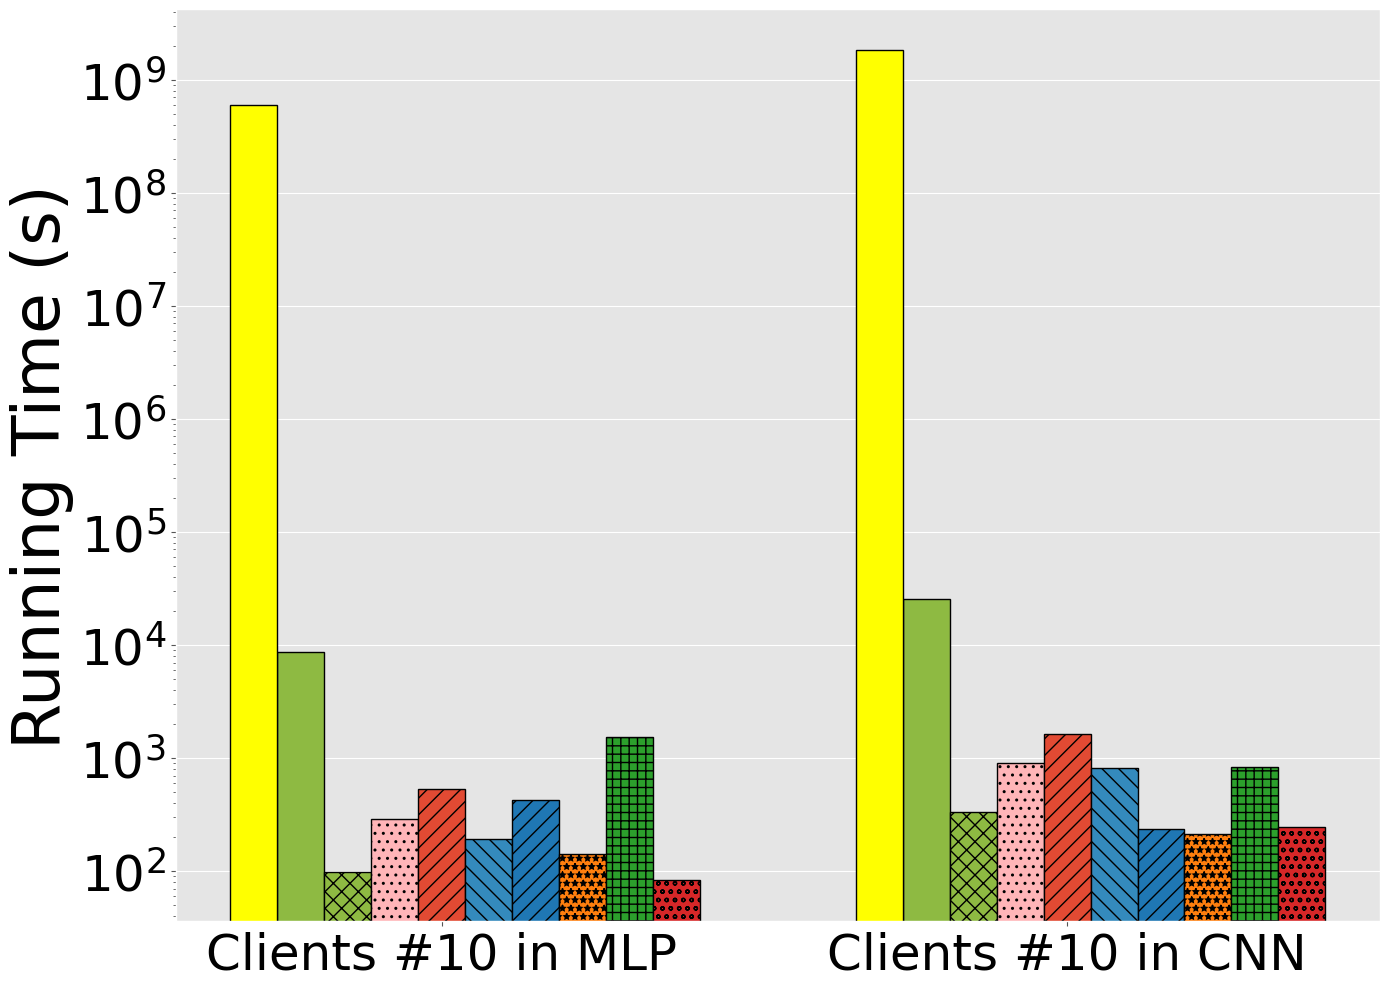

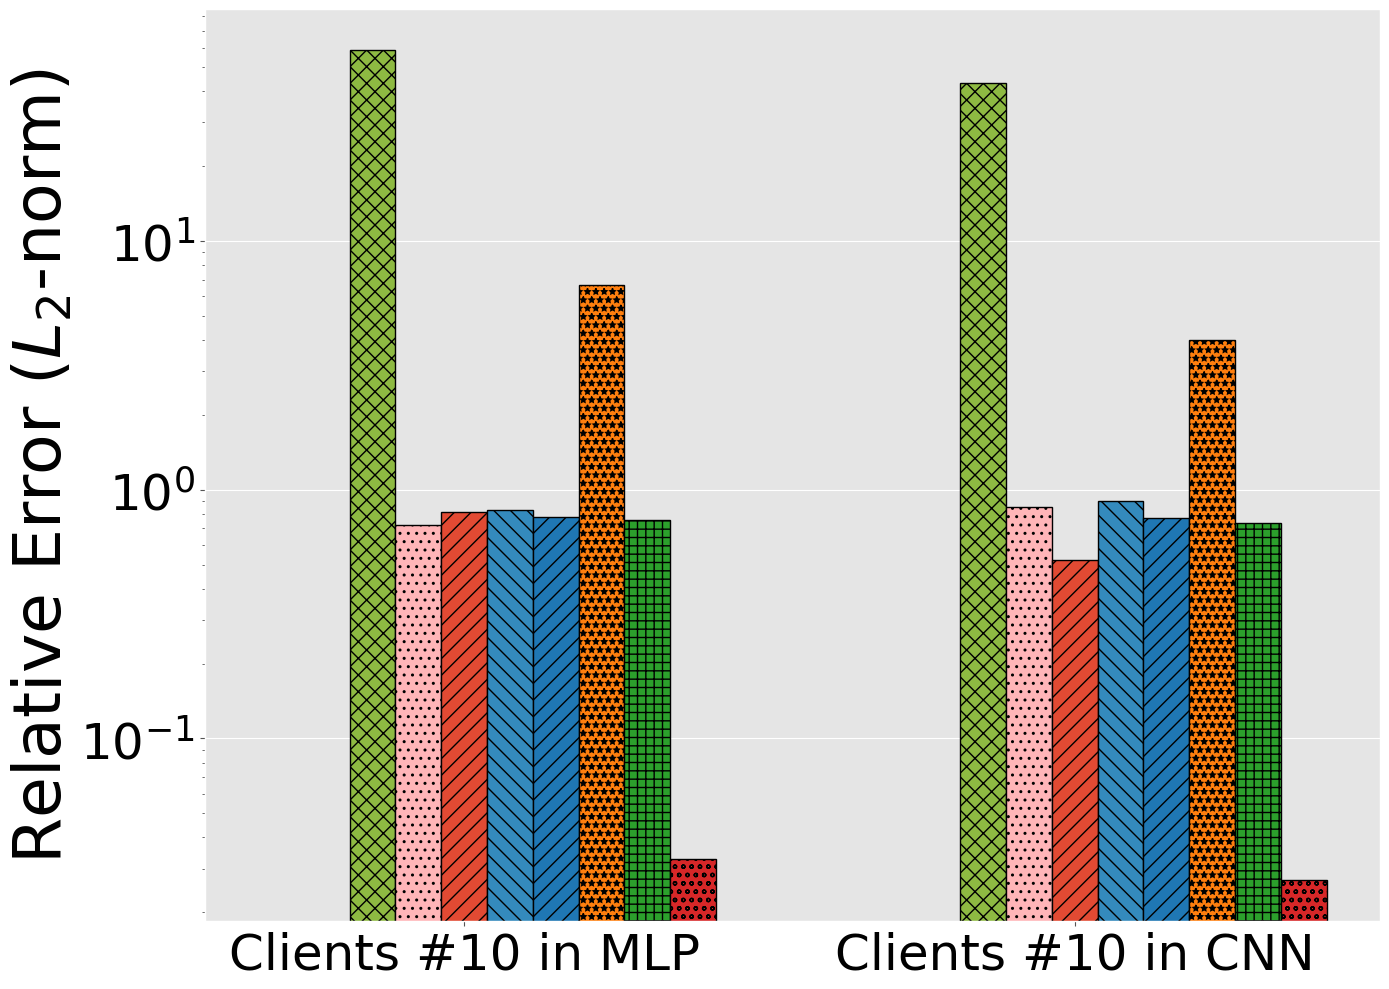

In [15]:
all_algsres = []
cnums = ['10']
for cnum in cnums:
    with open(exp_path+'linear_model_'+ cnum +'_mnist_same.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)
    with open(exp_path+'cnn_model_'+ cnum +'_mnist_same.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)



baralgstimes_real(all_algsres, 'real_same')
baralgserror_real(all_algsres, 'real_same')
print("===============================MLP=================================")
for algres in all_algsres:
    # if ind == 1:
    for k, v in algres.items():
        print(" {}'s times={}, l2-norm={}".format(k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))
    print("\n===========================CNN========================================")

===============================MLP=================================
 Comb-Shapley's times=28990.71924618288, l2-norm=0.0
 Perm-Shapley's times=2214911380.4977794, l2-norm=1.0642225433974016e-11
 Extended-TMC's times=703.7003273399896, l2-norm=0.8220153353777807
 OR's times=136.1165371359093, l2-norm=3.7108286185385864
 $lambda$-MR's times=2480.0874734951067, l2-norm=0.7413337931151237
 Extended-GTB's times=1281.0886906731757, l2-norm=0.8789266197439242
 DIG-FL's times=775.2220908390009, l2-norm=21.735527012935663
 CC-Shapley's times=1857.5765428796003, l2-norm=15.514431325607754
 Light Sampling's times=205.90181861497695, l2-norm=0.08622924116710548
 GTG-Shapley's times=763.775572861312, l2-norm=0.7693091460213006

===========================CNN========================================
 Comb-Shapley's times=24522.861103830102, l2-norm=0.0
 Perm-Shapley's times=1757100443.4576318, l2-norm=1.3072283369960842e-11
 Extended-TMC's times=793.8143921929295, l2-norm=0.8062214361586867
 OR's tim

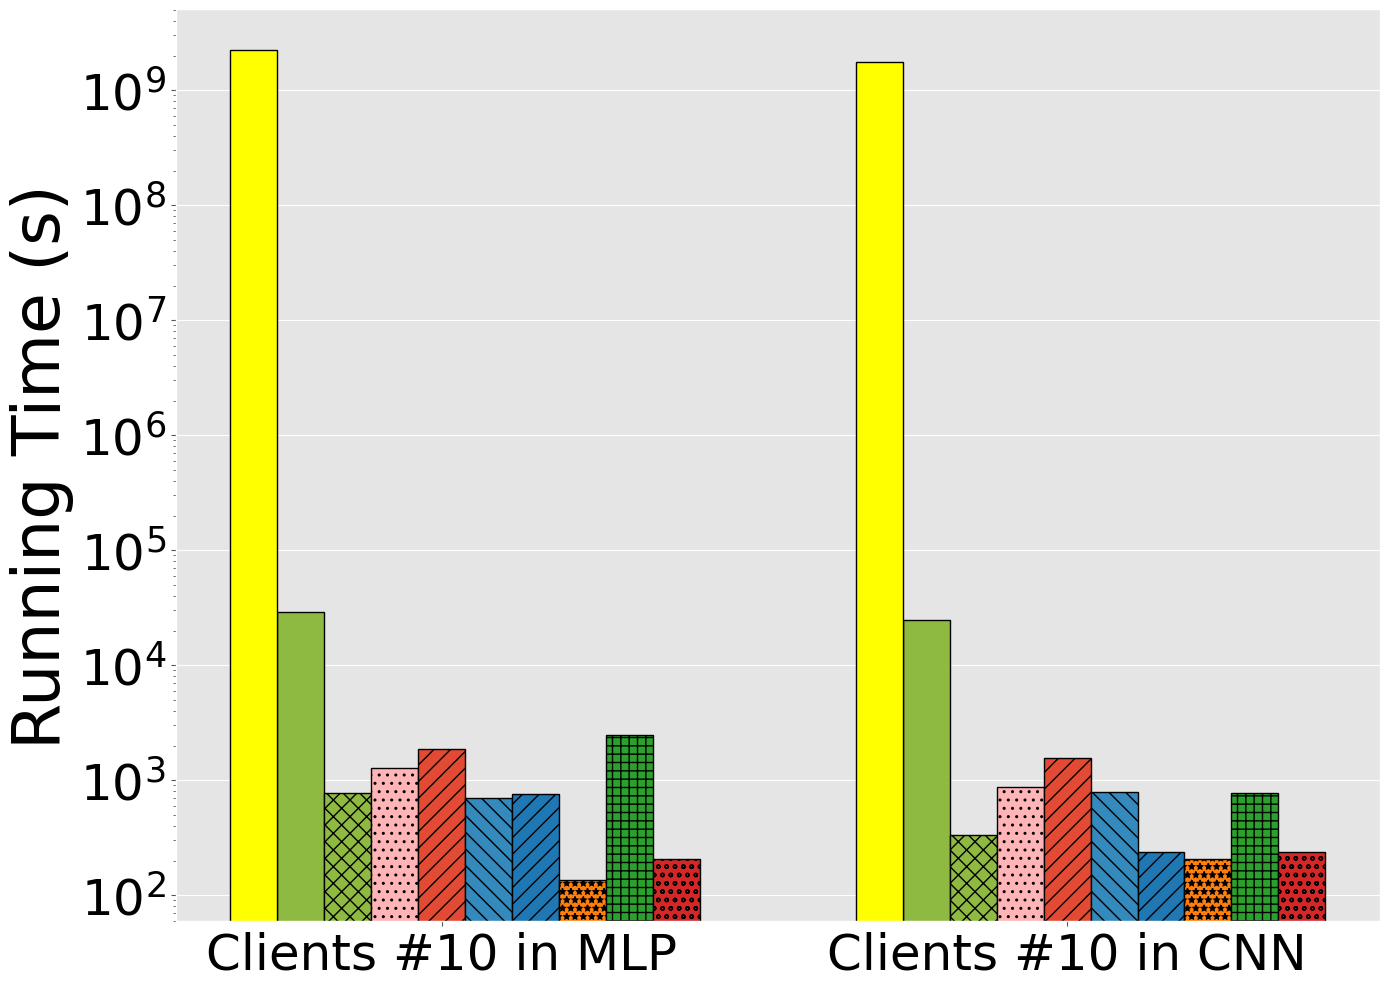

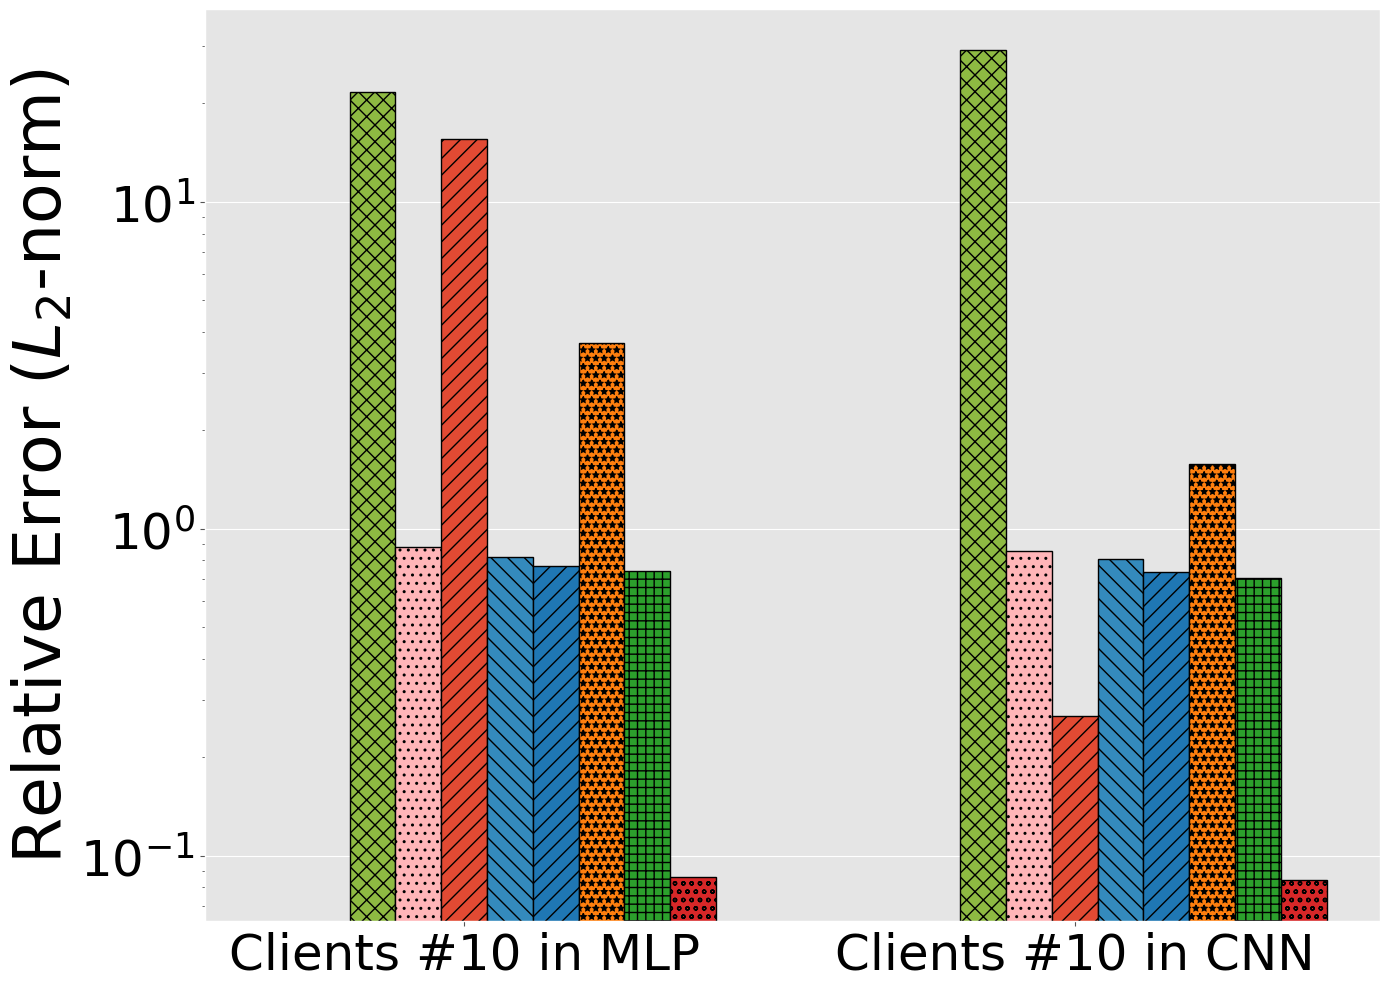

In [16]:
all_algsres = []
cnums = ['10']
for cnum in cnums:
    with open(exp_path+'linear_model_'+ cnum +'_mnist_mixDtr.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)
    with open(exp_path+'cnn_model_'+ cnum +'_mnist_mixDtr.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)



baralgstimes_real(all_algsres, 'real_mix_distribution')
baralgserror_real(all_algsres, 'real_mix_distribution')

print("===============================MLP=================================")
for algres in all_algsres:
    # if ind == 1:
    for k, v in algres.items():
        print(" {}'s times={}, l2-norm={}".format(k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))
    print("\n===========================CNN========================================")

===============================MLP=================================
 Comb-Shapley's times=8657.187696004286, l2-norm=0.0
 Perm-Shapley's times=580903436.9660882, l2-norm=1.2083049795315143e-11
 Extended-TMC's times=253.63531118573155, l2-norm=0.8254201028390175
 OR's times=135.29796148755122, l2-norm=3.193056687813739
 $lambda$-MR's times=1416.7297138156719, l2-norm=0.7476943667039284
 Extended-GTB's times=277.97477632487426, l2-norm=0.7771178353003392
 DIG-FL's times=92.4505198179977, l2-norm=58.88560238636952
 CC-Shapley's times=513.6903082328499, l2-norm=0.8324400922177488
 Light Sampling's times=79.96826811897336, l2-norm=0.03381956014985991
 GTG-Shapley's times=398.03862768999534, l2-norm=0.7662000543914159

===========================CNN========================================
 Comb-Shapley's times=24558.120747755922, l2-norm=0.0
 Perm-Shapley's times=1760971959.3211143, l2-norm=1.7229538335164117e-11
 Extended-TMC's times=796.2152475769399, l2-norm=0.8301221400856821
 OR's times

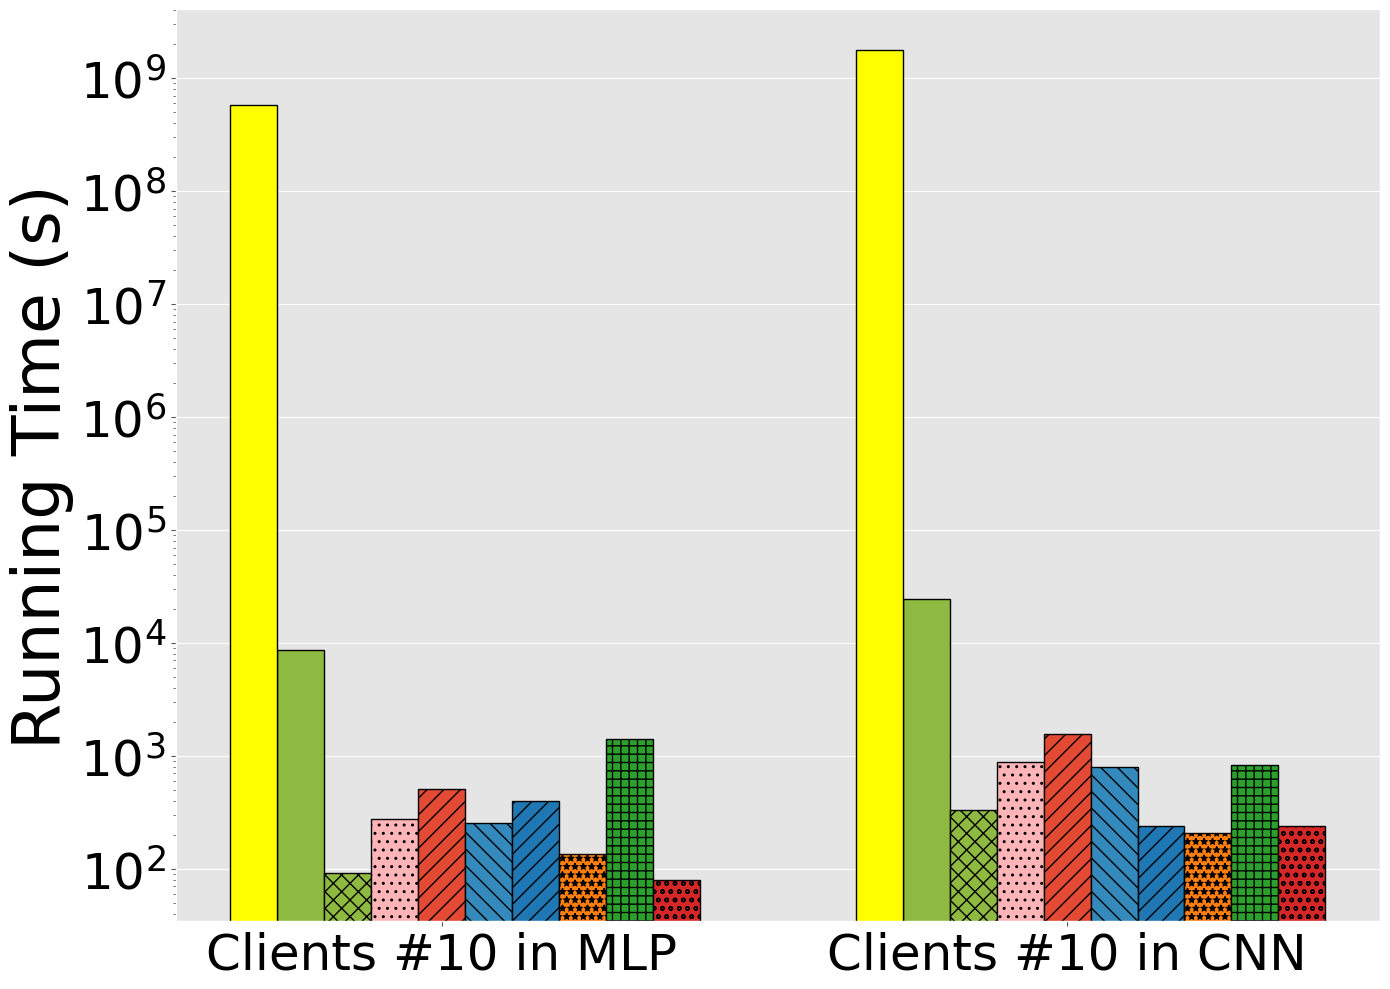

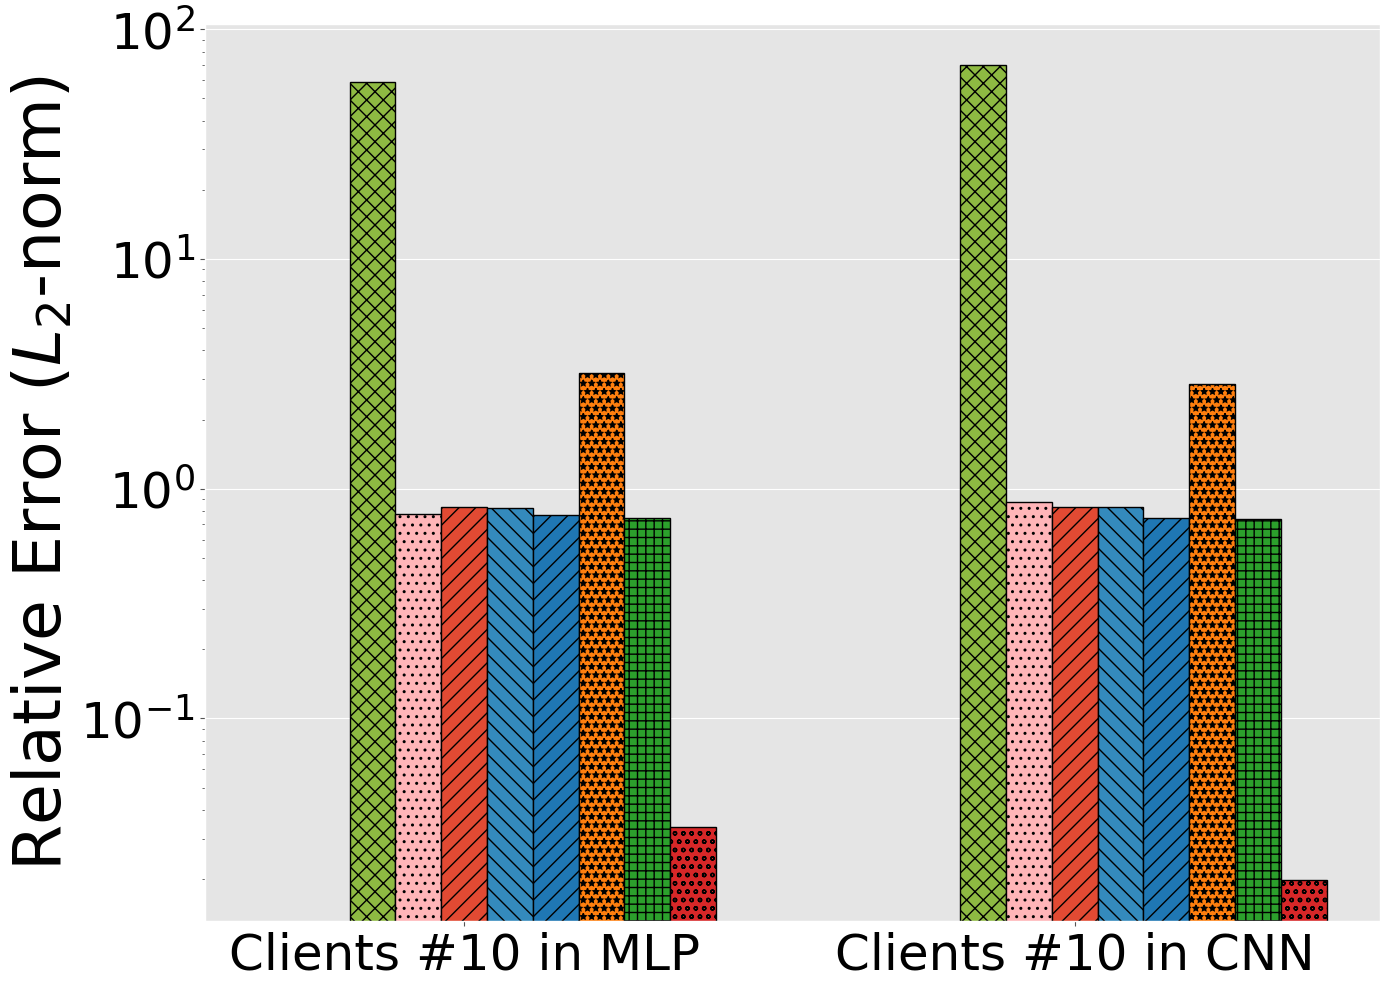

In [17]:
all_algsres = []
cnums = ['10']
for cnum in cnums:
    with open(exp_path+'linear_model_'+ cnum +'_mnist_mixSize.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)
    with open(exp_path+'cnn_model_'+ cnum +'_mnist_mixSize.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)



baralgstimes_real(all_algsres, 'real_mix_size')
baralgserror_real(all_algsres, 'real_mix_size')
print("===============================MLP=================================")
for algres in all_algsres:
    # if ind == 1:
    for k, v in algres.items():
        print(" {}'s times={}, l2-norm={}".format(k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))
    print("\n===========================CNN========================================")



===============================MLP=================================
 Comb-Shapley's times=8680.121485802403, l2-norm=0.0
 Perm-Shapley's times=591397015.401925, l2-norm=1.633620847810578e-11
 Extended-TMC's times=264.4053925718181, l2-norm=0.8274449033576714
 OR's times=139.3465709242737, l2-norm=5.430637811467866
 $lambda$-MR's times=1445.9989547102596, l2-norm=0.7262652539377504
 Extended-GTB's times=281.4182280356181, l2-norm=0.8443854195709329
 DIG-FL's times=95.45272086386103, l2-norm=36.45716670883978
 CC-Shapley's times=506.7218653858872, l2-norm=0.34096636235894356
 Light Sampling's times=85.26548977801576, l2-norm=0.032900997223434376
 GTG-Shapley's times=438.65152405842673, l2-norm=0.7619550728768939

===========================CNN========================================
 Comb-Shapley's times=24589.93837080436, l2-norm=0.0
 Perm-Shapley's times=1762811582.8457558, l2-norm=9.549155075397907e-12
 Extended-TMC's times=653.7546125470544, l2-norm=0.9013228356819875
 OR's times=207

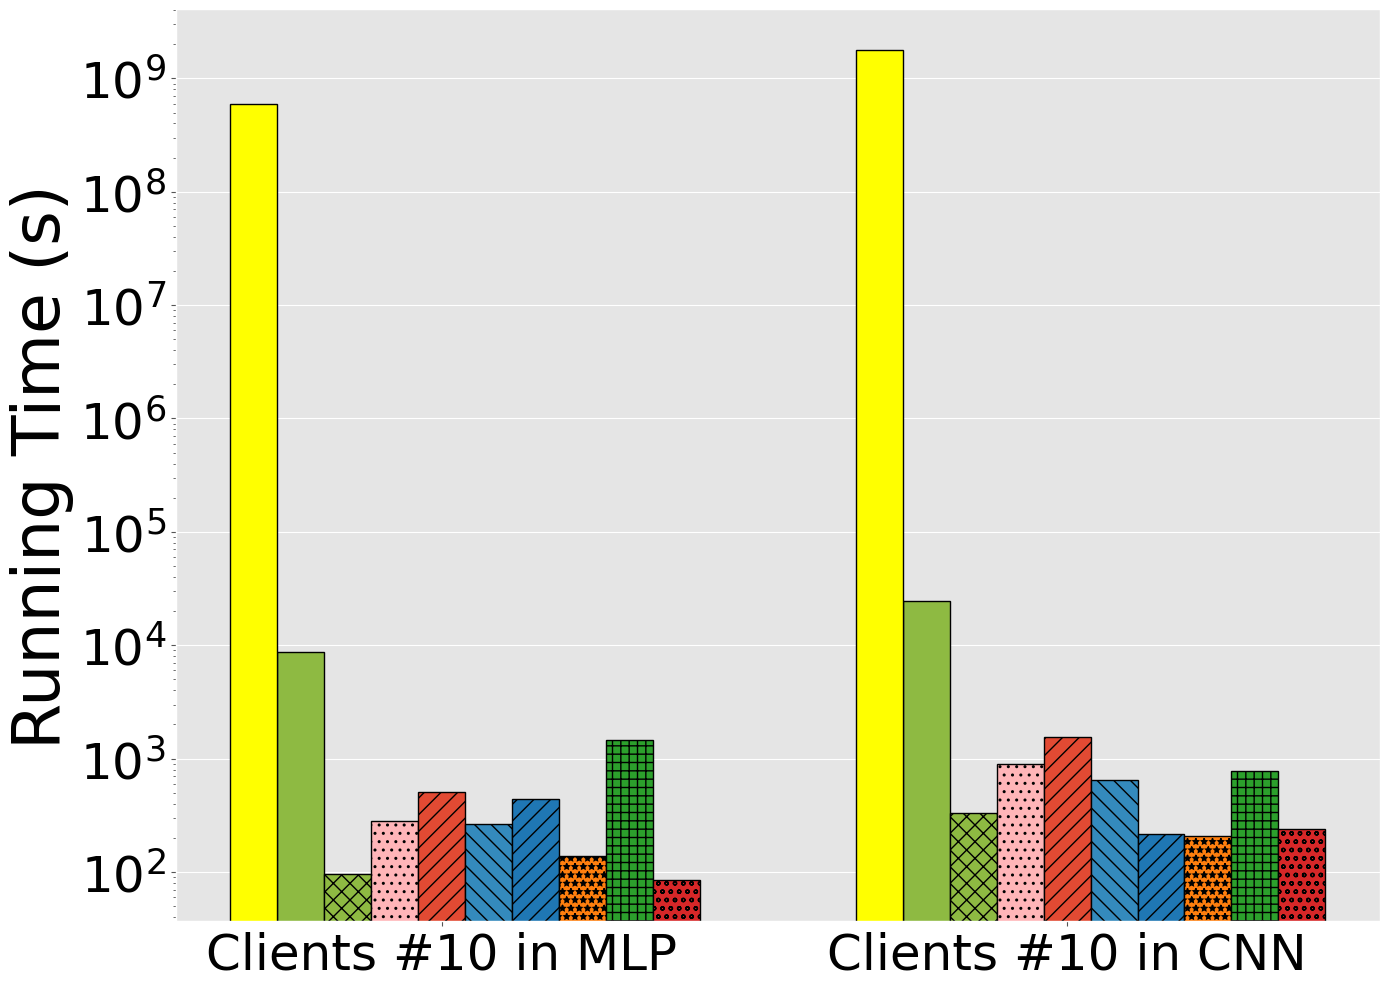

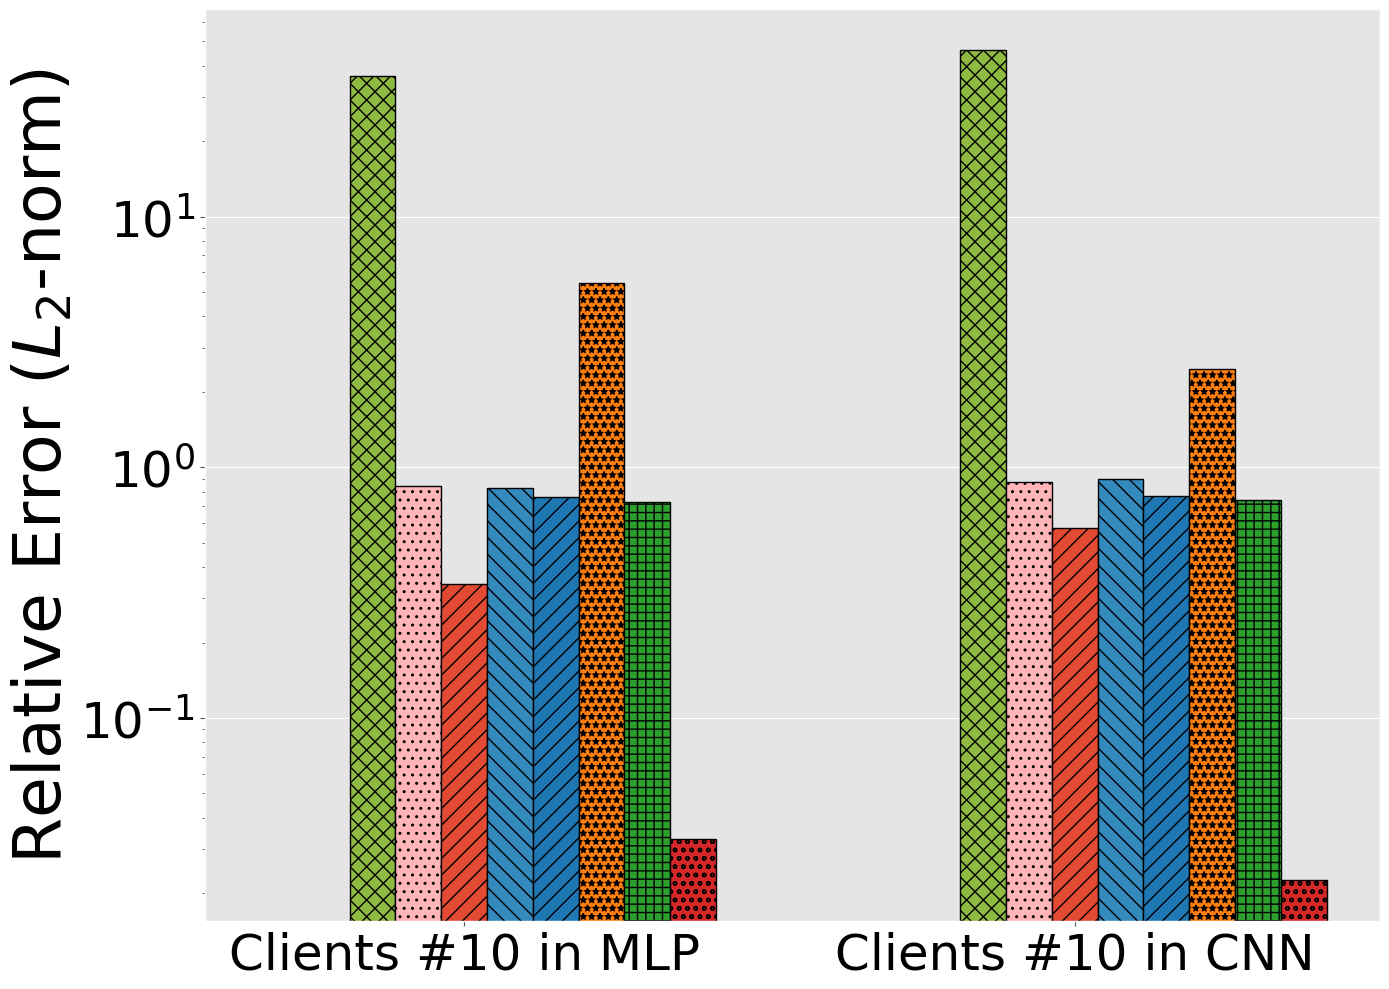

In [18]:
all_algsres = []
cnums = ['10']
for cnum in cnums:
    with open(exp_path+'linear_model_'+ cnum +'_mnist_noiseX.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)
    with open(exp_path+'cnn_model_'+ cnum +'_mnist_noiseX.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)



baralgstimes_real(all_algsres, 'real_noiseX')
baralgserror_real(all_algsres, 'real_noiseX')

print("===============================MLP=================================")
for algres in all_algsres:
    # if ind == 1:
    for k, v in algres.items():
        print(" {}'s times={}, l2-norm={}".format(k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))
    print("\n===========================CNN========================================")



===============================MLP=================================
 Comb-Shapley's times=31030.17122913571, l2-norm=0.0
 Perm-Shapley's times=2345457867.1925545, l2-norm=1.2955000602001948e-11
 Extended-TMC's times=961.8829353391484, l2-norm=0.8238515719556098
 OR's times=135.5065594939515, l2-norm=3.1191533885409575
 $lambda$-MR's times=2491.2591585209593, l2-norm=0.7367164854226084
 Extended-GTB's times=944.8141785690677, l2-norm=0.828093639389395
 DIG-FL's times=291.8708792620746, l2-norm=35.11537466070541
 CC-Shapley's times=1926.19361819615, l2-norm=0.6112194307134193
 Light Sampling's times=558.253079684946, l2-norm=0.036885185483407655
 GTG-Shapley's times=721.4638783669798, l2-norm=0.7551828325024877

===========================CNN========================================
 Comb-Shapley's times=24733.234859030752, l2-norm=0.0
 Perm-Shapley's times=1771926483.7800243, l2-norm=1.235223249153387e-11
 Extended-TMC's times=506.92012192786206, l2-norm=0.8314484680286602
 OR's times=20

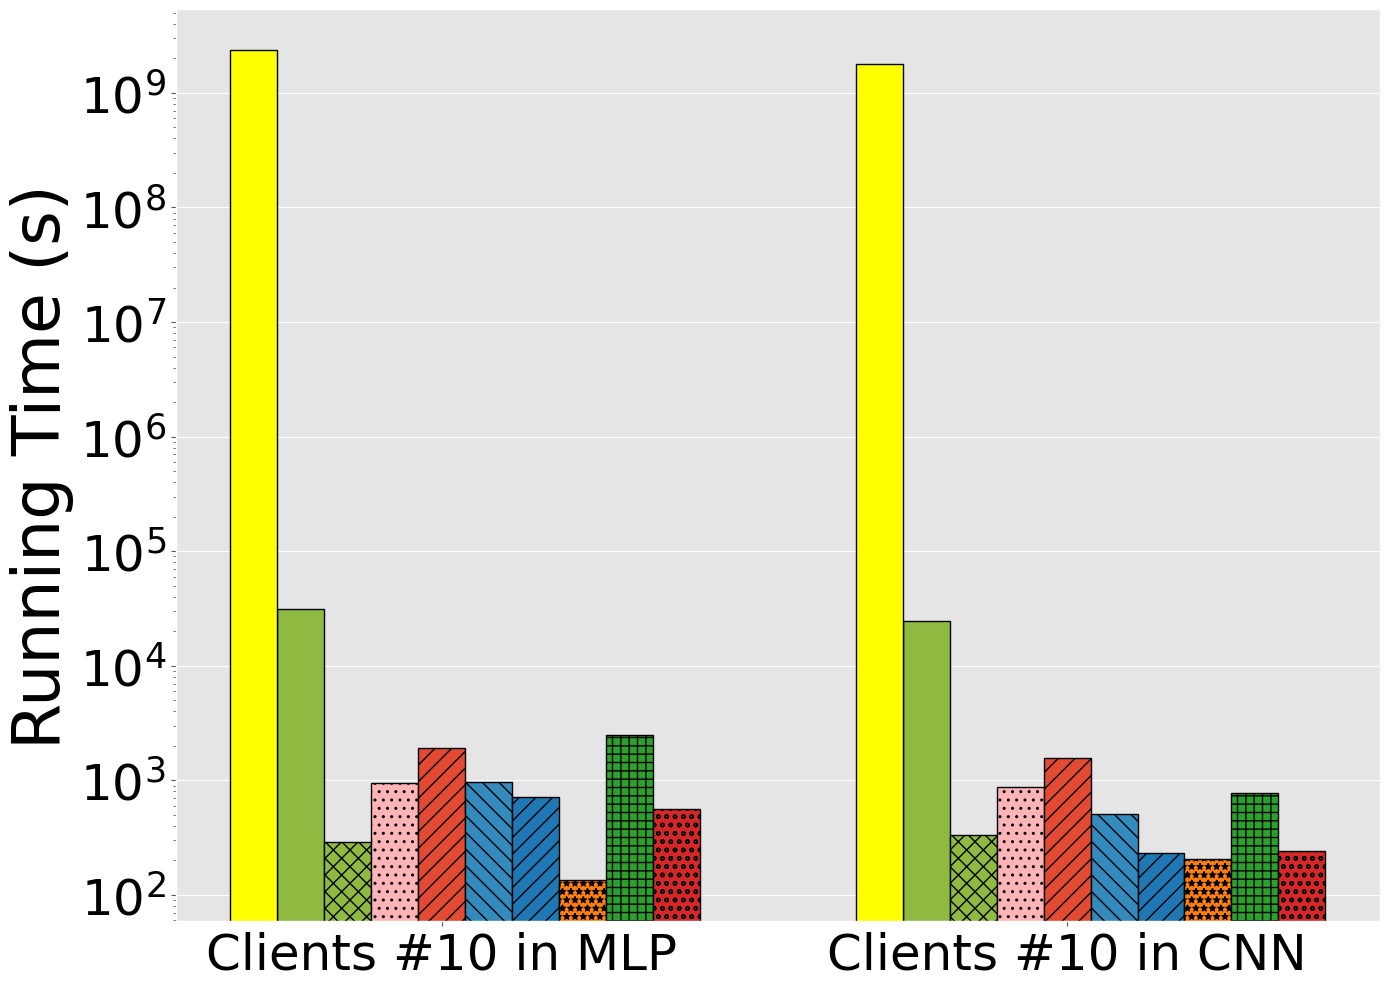

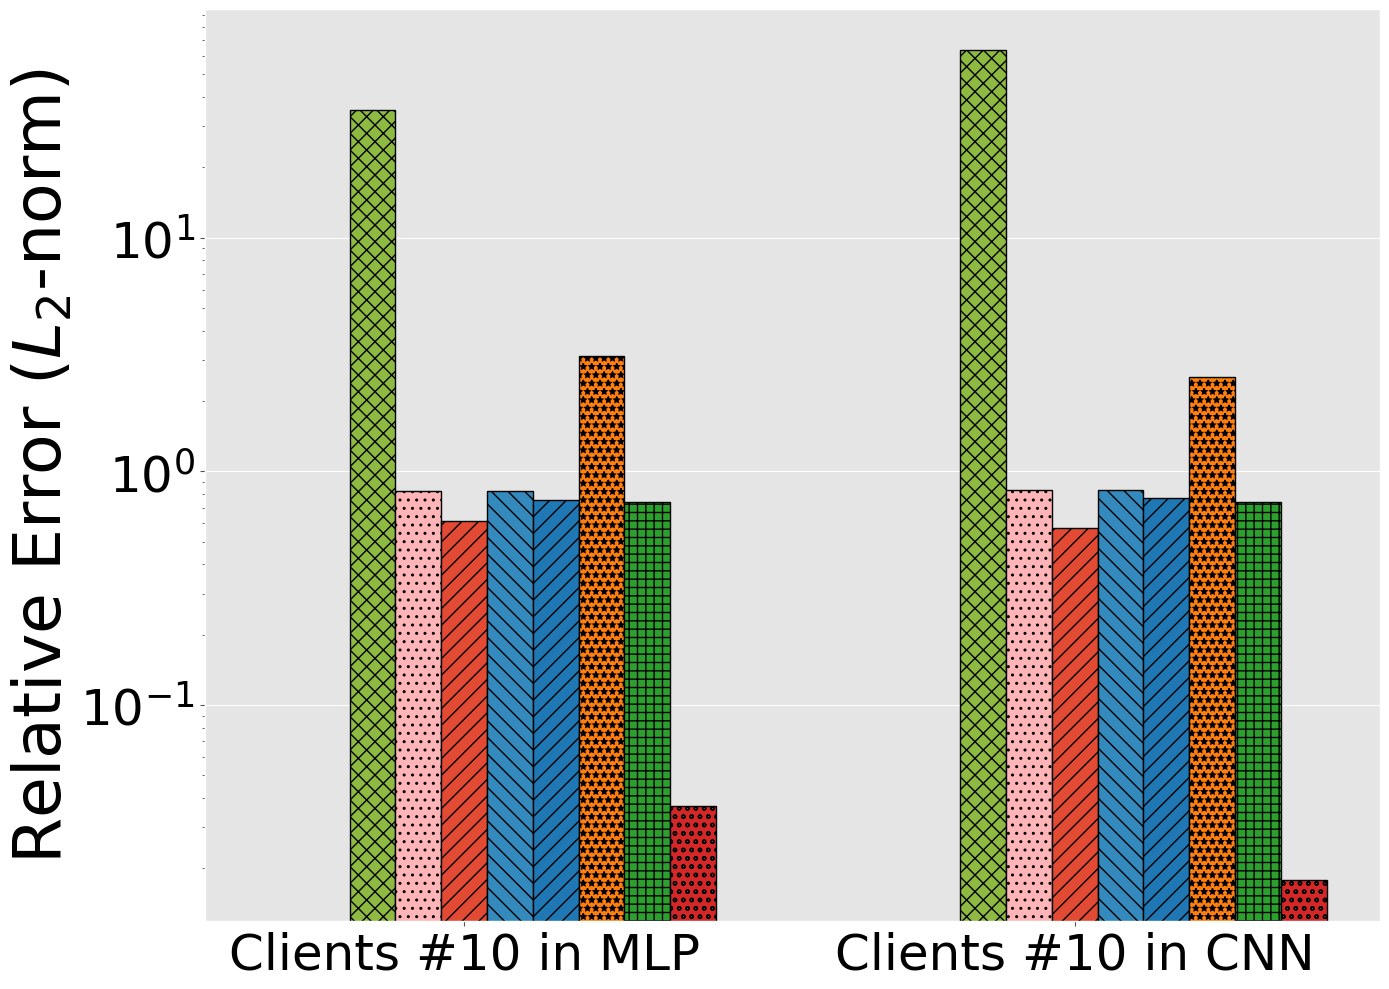

In [19]:
all_algsres = []
cnums = ['10']
for cnum in cnums:
    with open(exp_path+'linear_model_'+ cnum +'_mnist_noiseY.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)
    with open(exp_path+'cnn_model_'+ cnum +'_mnist_noiseY.res', 'rb') as fin: 
        alg_res = pickle.load(fin)
        all_algsres.append(alg_res)



baralgstimes_real(all_algsres, 'real_noiseY')
baralgserror_real(all_algsres, 'real_noiseY')

print("===============================MLP=================================")
for algres in all_algsres:
    # if ind == 1:
    for k, v in algres.items():
        print(" {}'s times={}, l2-norm={}".format(k, v[1], l2norm(algres['Comb-Shapley'][0], v[0])))
    print("\n===========================CNN========================================")
